<class 'networkx.classes.multidigraph.MultiDiGraph'>


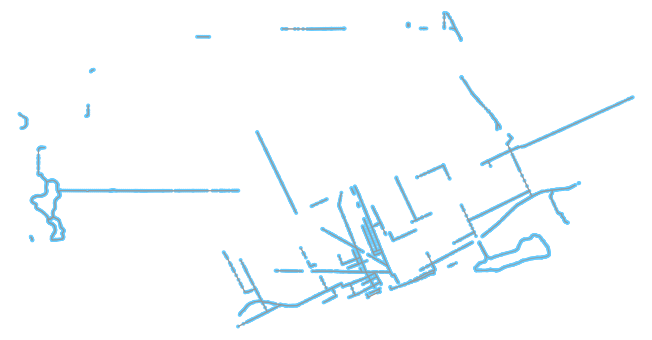

(<Figure size 822.985x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f489d27ba8>)

In [34]:
import numpy as np
import networkx as nx
import os
import osmnx as ox
import time

name='Detroit'
# Call this function to get the data 
def get_data(name='Detroit', mode='bike', root_path='../data/'):
    folders = os.listdir(root_path)
    for folder in folders:
        if folder == name:
            files = os.listdir(root_path+folder)
            bike_data = [file for file in files if mode in file][0]
            path = root_path + folder+ '/'+ bike_data;
            #path = folder+ '/'+ bike_data;

            #print(path)
    return ox.load_graphml('C:/Users/nlepore/ComplexityScienceProject1/data/{}/{}_bike.graphml'.format(name,name))
    #return ox.load_graphml(path)
G = get_data(name)
print(type(G))
ox.plot_graph(G)

In [36]:
#for n, d in list(G.nodes(data=True)):
#    print(d)

In [89]:
# print(G.edges(('6316199', '1360288038'), data=True))

for u, v, d in list(G.edges(data=True)):
    d['length'] = float(d['length'])

G.edges(('6316199', '1360288038'), data='length')

OutMultiEdgeDataView([])

In [90]:
def make_trip(G):
    nodes = np.random.choice(G.nodes(), 2)
    return nodes

failed = 0
path_length = 0
for i in range(100): 
    u,v = make_trip(G)
    try: 
        path_length += nx.shortest_path_length(G, source=u, target=v, weight='length')
    except:
        failed += 1


In [99]:
def get_data(G_bike, name, algorithm):
    
    start = time.time()
    # 0.- Create lists to store data
    nodes_cc = []
    length_cc = []
    directness = []
    delta = []
    i_s = []
    j_s = []
    wcc = [cc for cc in nx.weakly_connected_component_subgraphs(G_bike)]
    
    # Save a 0 status
    length_cc.append(0)
    delta.append(0)  
    nodes_cc.append(0)
    i_s.append(0)
    j_s.append(0)
    #Save original status
    wcc = [cc for cc in nx.weakly_connected_component_subgraphs(
            G_bike)]  # Get a list of the WCC
    wcc.sort(key=len, reverse=True)  # Sort the list from the largest to smallest
    nodes_cc.append(len(wcc[0]))
    l_temp = 0
    for e in wcc[0].edges(data=True):
        try:
            l_temp += e[2]['length']
        except:
            pass
    length_cc.append(l_temp/1000)
    delta.append(0)  
    i_s.append(0)
    j_s.append(0)
    to_iterate = len(wcc)-1  # We'll iterate over n-1 connected components
    ncc = 0
    print('  + Starting the algorithm:')
    for cc in range(to_iterate):
        #clear_output(wait=True)
        wcc = [cc for cc in nx.weakly_connected_component_subgraphs(
            G_bike)]  # Get a list of the WCC
        wcc.sort(key=len, reverse=True)  # Sort the list from the largest to smallest
        closest_ij = algorithm(wcc)  # Get the clossest pair of nodes between the two LCC's
        i_s.append(closest_ij['i'])  # Store the sequence of links connected
        j_s.append(closest_ij['j'])
        p_delta = delta[-1]  # Get the latest delta
        delta.append(p_delta+closest_ij['dist'])  # Add the new delta measure to the list of deltas
        # Record the new number of nodes inside the LCC after merging the two LCC's
        nodes_cc.append(len(wcc[0])+len(wcc[1]))
        l_temp = 0
        for e in wcc[0].edges(data=True):
            try:
                l_temp += e[2]['length']
            except:
                pass
        for e in wcc[1].edges(data=True):
            try:
                l_temp += e[2]['length']
            except:
                pass
        length_cc.append(l_temp/1000)
        if closest_ij['i'] != closest_ij['j']:
            G_bike.add_edge(closest_ij['i'], closest_ij['j'], length=0)  # closest_ij['dist'
        ncc += 1
        print('{} {}/{} done \nElapsed time {} min, avg. {} seg, \nTime to go: {} min.'.format(name, ncc, to_iterate, 
                                                                                               round((time.time() - start)/60, 2), 
                                                                                               round((time.time()-start)/ncc, 2), 
                                                                                               round((((time.time()-start)/ncc)*(to_iterate-ncc))/60, 2)))
        if delta[-1] > 200000:
            break
    return delta, nodes_cc, length_cc, i_s, j_s
get_data(G, name, L2S)

  + Starting the algorithm:
Detroit 1/21 done 
Elapsed time 0.01 min, avg. 0.58 seg, 
Time to go: 0.19 min.
Detroit 2/21 done 
Elapsed time 0.01 min, avg. 0.42 seg, 
Time to go: 0.13 min.
Detroit 3/21 done 
Elapsed time 0.02 min, avg. 0.37 seg, 
Time to go: 0.11 min.
Detroit 4/21 done 
Elapsed time 0.02 min, avg. 0.35 seg, 
Time to go: 0.1 min.
Detroit 5/21 done 
Elapsed time 0.03 min, avg. 0.35 seg, 
Time to go: 0.09 min.
Detroit 6/21 done 
Elapsed time 0.04 min, avg. 0.36 seg, 
Time to go: 0.09 min.
Detroit 7/21 done 
Elapsed time 0.05 min, avg. 0.41 seg, 
Time to go: 0.1 min.
Detroit 8/21 done 
Elapsed time 0.05 min, avg. 0.39 seg, 
Time to go: 0.08 min.
Detroit 9/21 done 
Elapsed time 0.06 min, avg. 0.37 seg, 
Time to go: 0.07 min.
Detroit 10/21 done 
Elapsed time 0.06 min, avg. 0.36 seg, 
Time to go: 0.07 min.
Detroit 11/21 done 
Elapsed time 0.06 min, avg. 0.35 seg, 
Time to go: 0.06 min.
Detroit 12/21 done 
Elapsed time 0.07 min, avg. 0.34 seg, 
Time to go: 0.05 min.
Detroit 13/

([0,
  0,
  200.10174609419377,
  235.4163124552374,
  246.92376074696122,
  256.7966661774617,
  1945.273652185601,
  2444.589351605233,
  2570.104314391013,
  3504.5262016241545,
  3598.7000982162713,
  3664.213176008073,
  7213.393956890217,
  7421.888783184992,
  7429.9339708613525,
  7441.214860799958,
  7672.945920268331,
  8247.203545587477,
  8260.16207346613,
  8272.437222957422,
  8280.418605426306,
  8455.424335805614,
  8509.129590458837],
 [0,
  3489,
  3501,
  3513,
  3525,
  3536,
  3547,
  3558,
  3568,
  3578,
  3587,
  3596,
  3604,
  3612,
  3620,
  3627,
  3634,
  3640,
  3646,
  3652,
  3657,
  3660,
  3663],
 [0,
  255.0802949999989,
  255.38548299999894,
  257.34744899999896,
  258.7923369999989,
  259.2958429999989,
  259.65493099999895,
  260.4536089999988,
  261.2670629999988,
  261.6436969999987,
  263.1602609999988,
  264.508076999999,
  265.6872869999986,
  266.33160099999867,
  266.6336749999986,
  267.0283529999987,
  268.10284899999857,
  268.66597499999

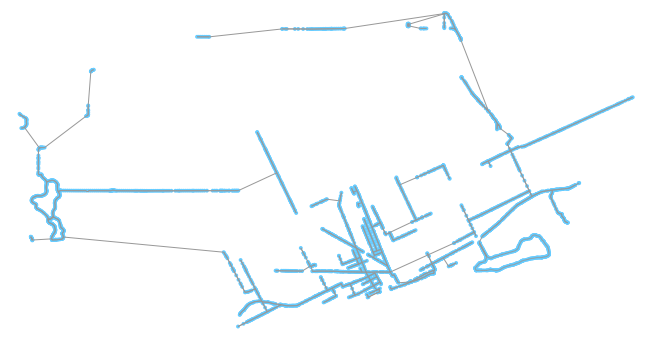

(<Figure size 822.985x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23401d749e8>)

In [100]:
ox.plot_graph(G)

In [35]:
G_edit = G.copy()
wcc = [cc for cc in nx.weakly_connected_component_subgraphs(G_edit)]
wcc.sort(key=len, reverse=True)
len(wcc[0])

732

In [30]:
def euclidean_dist_vec(y1, x1, y2, x2):
    '''
    Calculate the euclidean distance between two points.
    '''
    distance = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    return distance

def L2S(wcc):
    '''
    Find the closest pair of nodes between two different connected components.
    ---
    wcc: list connected components

    returns: dict nodes i and j and distance
    '''
    closest_pair = {'i': 0, 'j': 0, 'dist': np.inf}
    for i in wcc[0].nodes(data=True):
        i_coord = (i[1]['y'], i[1]['x'])
        for j in wcc[1].nodes(data=True):
            j_coord = (j[1]['y'], j[1]['x'])
            dist = euclidean_dist_vec(float(i_coord[0]), float(i_coord[1]), float(j_coord[0]), float(j_coord[1]))
            if dist < closest_pair['dist']:
                closest_pair['i'] = i[0]
                closest_pair['j'] = j[0]
                closest_pair['dist'] = dist
    return closest_pair

l2s_closest = L2S(wcc)
print(l2s_closest)

{'i': 1269682895, 'j': 62728238, 'dist': 3407.35413711116}


In [31]:
G_edit.add_edge(float(l2s_closest['i']),float(l2s_closest['j']))

1

Unedited Graph


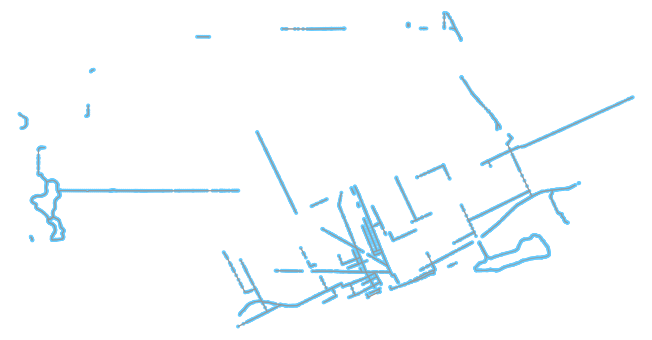

(<Figure size 822.985x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f489f305f8>)

In [36]:
print('Unedited Graph')
ox.plot_graph(G)

Detroit improved bike network, using L2S algorithm:


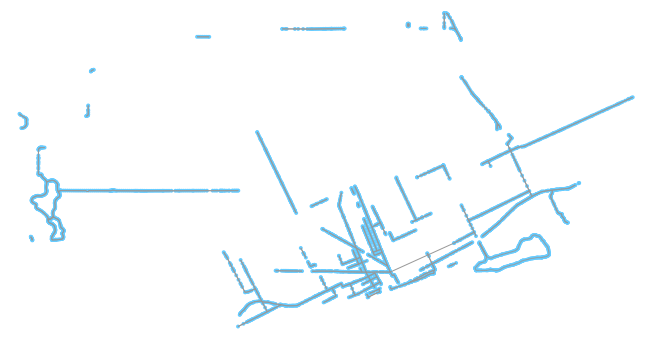

(<Figure size 822.985x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f48965d080>)

In [38]:
l2s_closest = L2S(wcc)
G_edit.add_edge(float(l2s_closest['i']),float(l2s_closest['j']))
print('{} improved bike network, using L2S algorithm:'.format(name))
ox.plot_graph(G_edit)

In [23]:
def L2C(wcc):
    '''
    Find the closest pair of nodes between two different connected components.
    ---
    wcc: list connected components

    returns: dict nodes i and j and distance
    '''
    closest_pair = {'i': 0, 'j': 0, 'dist': np.inf}
    for i in wcc[0].nodes(data=True):
        i_coord = (i[1]['y'], i[1]['x'])
        for j in wcc[1:]:
            for k in j.nodes(data=True):
                j_coord = (k[1]['y'], k[1]['x'])
                dist = euclidean_dist_vec(float(i_coord[0]), float(i_coord[1]), float(j_coord[0]), float(j_coord[1]))
                if dist < closest_pair['dist']:
                    closest_pair['i'] = i[0]
                    closest_pair['j'] = k[0]
                    closest_pair['dist'] = dist
    return closest_pair


<class 'networkx.classes.multidigraph.MultiDiGraph'>
Detroit improved bike network, using L2C algorithm:


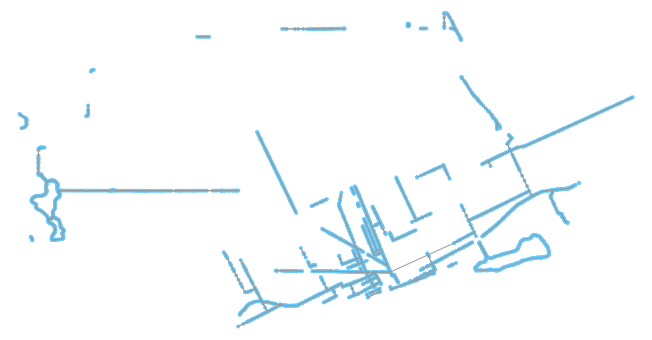

(<Figure size 822.985x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f4894be240>)

In [39]:
print(type(wcc[1]))
j =  wcc[1]

l2c_closest = L2C(wcc)
G_edit.add_edge(float(l2c_closest['i']),float(l2c_closest['j']))
print('{} improved bike network, using L2C algorithm:'.format(name))
ox.plot_graph(G_edit)

In [40]:
print(l2c_closest)

{'i': 4952616982, 'j': 62739104, 'dist': 9.872905430500484}


In [77]:
def R2C(wcc):
    '''
    Find the closest pair of nodes between two different connected components.
    ---
    wcc: list connected components

    returns: dict nodes i and j and distance
    '''
    closest_pair = {'i': 0, 'j': 0, 'dist': np.inf}
    num_clusters = len(wcc)
    cluster = np.random.choice(len(wcc))
    for i in wcc[cluster].nodes(data=True):
        i_coord = (i[1]['y'], i[1]['x'])
        for w,j in enumerate(wcc[1:]):
            if w == cluster - 1:
                break
            for k in j.nodes(data=True):
                j_coord = (k[1]['y'], k[1]['x'])
                dist = euclidean_dist_vec(float(i_coord[0]), float(i_coord[1]), float(j_coord[0]), float(j_coord[1]))
                if dist < closest_pair['dist']:
                    closest_pair['i'] = i[0]
                    closest_pair['j'] = k[0]
                    closest_pair['dist'] = dist
    return closest_pair


In [79]:
print(R2C(wcc))

{'i': 62639391, 'j': 62893622, 'dist': 811.1544895439023}


In [98]:
def Closest(wcc):
    '''
    Find the closest pair of nodes between two different connected components.
    ---
    wcc: list connected components

    returns: dict nodes i and j and distance
    '''
    closest_pair = {'i': 0, 'j': 0, 'dist': np.inf}
    for v,i in enumerate(wcc[0:]):
            for u in i.nodes(data=True):
                i_coord = (u[1]['y'], u[1]['x'])
                for w,j in enumerate(wcc[0:]):
                    if w == v:
                        break
                    for k in j.nodes(data=True):
                        j_coord = (k[1]['y'], k[1]['x'])
                        dist = euclidean_dist_vec(float(i_coord[0]), float(i_coord[1]), float(j_coord[0]), float(j_coord[1]))
                        if dist < closest_pair['dist']:
                            closest_pair['i'] = u[0]
                            closest_pair['j'] = k[0]
                            closest_pair['dist'] = dist
    return closest_pair


In [99]:
Closest(wcc)

{'i': 1236421882, 'j': 3415382187, 'dist': 0.057931624446231275}

In [131]:
def new_city(wcc, algy):
    """
    wcc = Sorted list of weakly connected subgraphs
    algy = desired path-adding algorithm
    
    """
    
    runs = len(wcc) - 1
    added_edges = []
    tot_length = 0
    for i in range(runs):
        added_edge = algy(wcc[i:])
        edge = (added_edge['i'],added_edge['j'],added_edge['dist'])
        added_edges.append(edge)
        tot_length = tot_length+edge[2]
    return added_edges, tot_length            
        

In [143]:
name = 'Detroit'
wcc = [cc for cc in nx.weakly_connected_component_subgraphs(G_edit)]
wcc.sort(key=len, reverse=True)
G = get_data(name)
edges, length = new_city(wcc, L2C)
print(length)

98752.1275918234


In [144]:
def add_edges(G, edges):
    for i in edges:
        G.add_edge(i[0], i[1], length = i[2])
        

In [145]:
add_edges(G, edges)

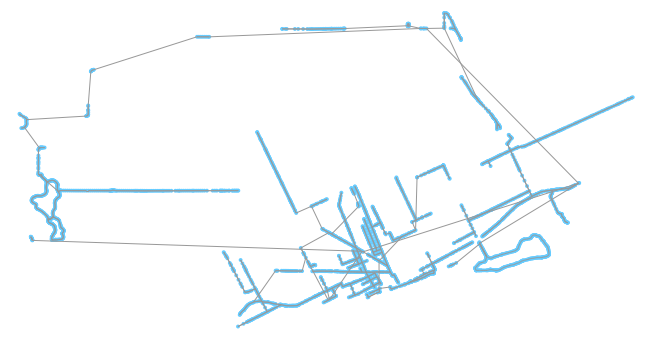

(<Figure size 822.985x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f48c833d68>)

In [146]:
ox.plot_graph(G)